In [1]:
#imports
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pycaret import *
from pycaret.classification import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (classification_report)
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
dados = pd.read_csv('dataset_versions\DatasetIA_v1.0.0.csv')
dados.head()

,ID,Nome,CPF,Cliente_ID,Produto,Categoria,Data_Compra,Valor_Compra,Quantidade_Parcelas,Data_Última_Compra,...,Salario,Tipo_Cartao_Credito,Gasto_Mensal_Cartao,Viaja_Frequentemente,Profissao,Renda_Mensal,Dependentes,Gênero,Data_Nascimento,Idade
0,0,Carlos Silva,44334054420,5721,Smartphone Samsung Galaxy S21,Eletrônicos,2024-07-15,4299.90,1,2024-02-10,...,5000,Platinum,3000,1,Engenheiro,5000,2,Masculino,1989-03-12,35
1,1,Ana Maria Souza,38460942422,4125,Fogão 4 Bocas,Eletrodomésticos,2024-06-12,1349.99,1,2024-01-22,...,4000,Gold,1500,0,Professora,4000,1,Feminino,1992-06-25,31
2,2,Fernando Alves,29236050395,2890,Churrasqueira Elétrica Mondial,Eletroportáteis,2024-05-20,749.99,1,2024-03-05,...,4500,Gold,1200,0,Advogado,4500,3,Masculino,1985-11-05,38
3,3,Juliana Castro,51429151358,4956,Notebook Dell Inspiron,Eletrônicos,2024-08-11,3999.90,1,2024-07-14,...,6000,Platinum,4000,1,Designer,6000,0,Feminino,1990-01-19,34
4,4,Roberto Lima,54518470109,6280,TV 50 Pol. LED,Eletrônicos,2024-09-15,2499.99,1,2024-08-20,...,4800,Gold,800,0,Analista,4800,0,Masculino,1995-05-30,29


In [3]:
dados.columns

Index(['ID', 'Nome', 'CPF', 'Cliente_ID', 'Produto', 'Categoria',
       'Data_Compra', 'Valor_Compra', 'Quantidade_Parcelas',
       'Data_Última_Compra', 'Segmento', 'Produto_Indicado',
       'Status_Indicação', 'Interesses', 'Gastos_Mensais', 'Salario',
       'Tipo_Cartao_Credito', 'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
       'Profissao', 'Renda_Mensal', 'Dependentes', 'Gênero', 'Data_Nascimento',
       'Idade'],
      dtype='object')

In [4]:
# colunas_selecionadas = dados[['Interresses3', 'Interesses2', 'Interesses']]  
# dados['Interesses'] = colunas_selecionadas.apply(lambda row: [row["Interresses3"], row["Interesses2"], row["Interesses"]], axis=1)
# dados = dados.drop(['Interresses3', 'Interesses2'], axis=1)
# dados.to_csv("Dataset_cliente.csv")

In [5]:
# dados['Viaja_Frequentemente'] = dados['Viaja_Frequentemente'].replace({"Sim": 1, "Não": 0})
# dados['Dependentes'] = dados['Dependentes'].replace({"1\"": 1, "0\"": 0, "2\"": 2, "3\"": 3})
# dados.to_csv("Dataset_cliente.csv")

In [6]:
def verificar_idade(idade):
    if 18 <= idade <=29:
        return "Plano Conexão"
    elif 30 <= idade < 50:
        return "Plano Serenidade"
    else:
        return "Plano Equilíbrio"

#dados['Data_Nascimento'] = pd.to_datetime(dados['Data_Nascimento'])
##dados['Idade'] = datetime.date.today().year - dados['Data_Nascimento'].dt.year
#dados['Plano'] = dados['Idade'].apply(verificar_idade)


#dados[['Idade', 'Plano']]


In [7]:
# especificacao = dados[['Interesses', 'Gastos_Mensais', 'Salario',
#        'Tipo_Cartao_Credito', 'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
#        'Profissao', 'Renda_Mensal', 'Dependentes', 'Idade', 'Plano']]
# especificacao.head(5)

In [8]:
def defineplano(interesses):
    if 'tecnologia' in interesses or 'Viagens' in interesses or 'Games' in interesses:
        return "Plano Conexão"
    elif 'Design' in interesses or 'Culinária' in interesses or 'Nutrição' in interesses:
        return "Plano Serenidade"
    else:
        return "Plano Equilíbrio"

# dados['Data_Nascimento'] = pd.to_datetime(dados['Data_Nascimento'])
# dados['Idade'] = datetime.date.today().year - dados['Data_Nascimento'].dt.year
dados['Plano'] = dados['Interesses'].apply(defineplano)
#dados[['Interesses', 'Plano']]

In [9]:
especificacao = dados[['Interesses', 'Gastos_Mensais', 'Salario',
       'Tipo_Cartao_Credito', 'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
       'Profissao', 'Renda_Mensal', 'Dependentes', 'Idade', 'Plano']]
especificacao.head()

,Interesses,Gastos_Mensais,Salario,Tipo_Cartao_Credito,Gasto_Mensal_Cartao,Viaja_Frequentemente,Profissao,Renda_Mensal,Dependentes,Idade,Plano
0,"['Tecnologia', 'Esportes', 'Viagens']",2000,5000,Platinum,3000,1,Engenheiro,5000,2,35,Plano Conexão
1,"['Culinária', 'Literatura', 'Decoração']",1800,4000,Gold,1500,0,Professora,4000,1,31,Plano Serenidade
2,"['Esportes', 'Viagens', 'Decoração']",2200,4500,Gold,1200,0,Advogado,4500,3,38,Plano Conexão
3,"['Viagens', 'Design', 'Tecnologia']",2500,6000,Platinum,4000,1,Designer,6000,0,34,Plano Conexão
4,"['Cinema', 'Tecnologia']",2200,4800,Gold,800,0,Analista,4800,0,29,Plano Equilíbrio


In [10]:
e = especificacao[['Gastos_Mensais', 'Salario','Gasto_Mensal_Cartao', 'Viaja_Frequentemente','Renda_Mensal', 'Dependentes']]
#e['Viaja_Frequentemente'] = e['Viaja_Frequentemente'].str.replace("Sim", 1, case=False, regex=False)
#e['Dependentes'] = e['Dependentes'].str.replace("0\"", "0", case=False, regex=False)
e['Viaja_Frequentemente'] = e['Viaja_Frequentemente'].replace({"Sim": 1, "Não": 0})
e['Dependentes'] = e['Dependentes'].replace({"1\"": 1, "0\"": 0, "2\"": 2, "3\"": 3})
e.head()

,Gastos_Mensais,Salario,Gasto_Mensal_Cartao,Viaja_Frequentemente,Renda_Mensal,Dependentes
0,2000,5000,3000,1,5000,2
1,1800,4000,1500,0,4000,1
2,2200,4500,1200,0,4500,3
3,2500,6000,4000,1,6000,0
4,2200,4800,800,0,4800,0


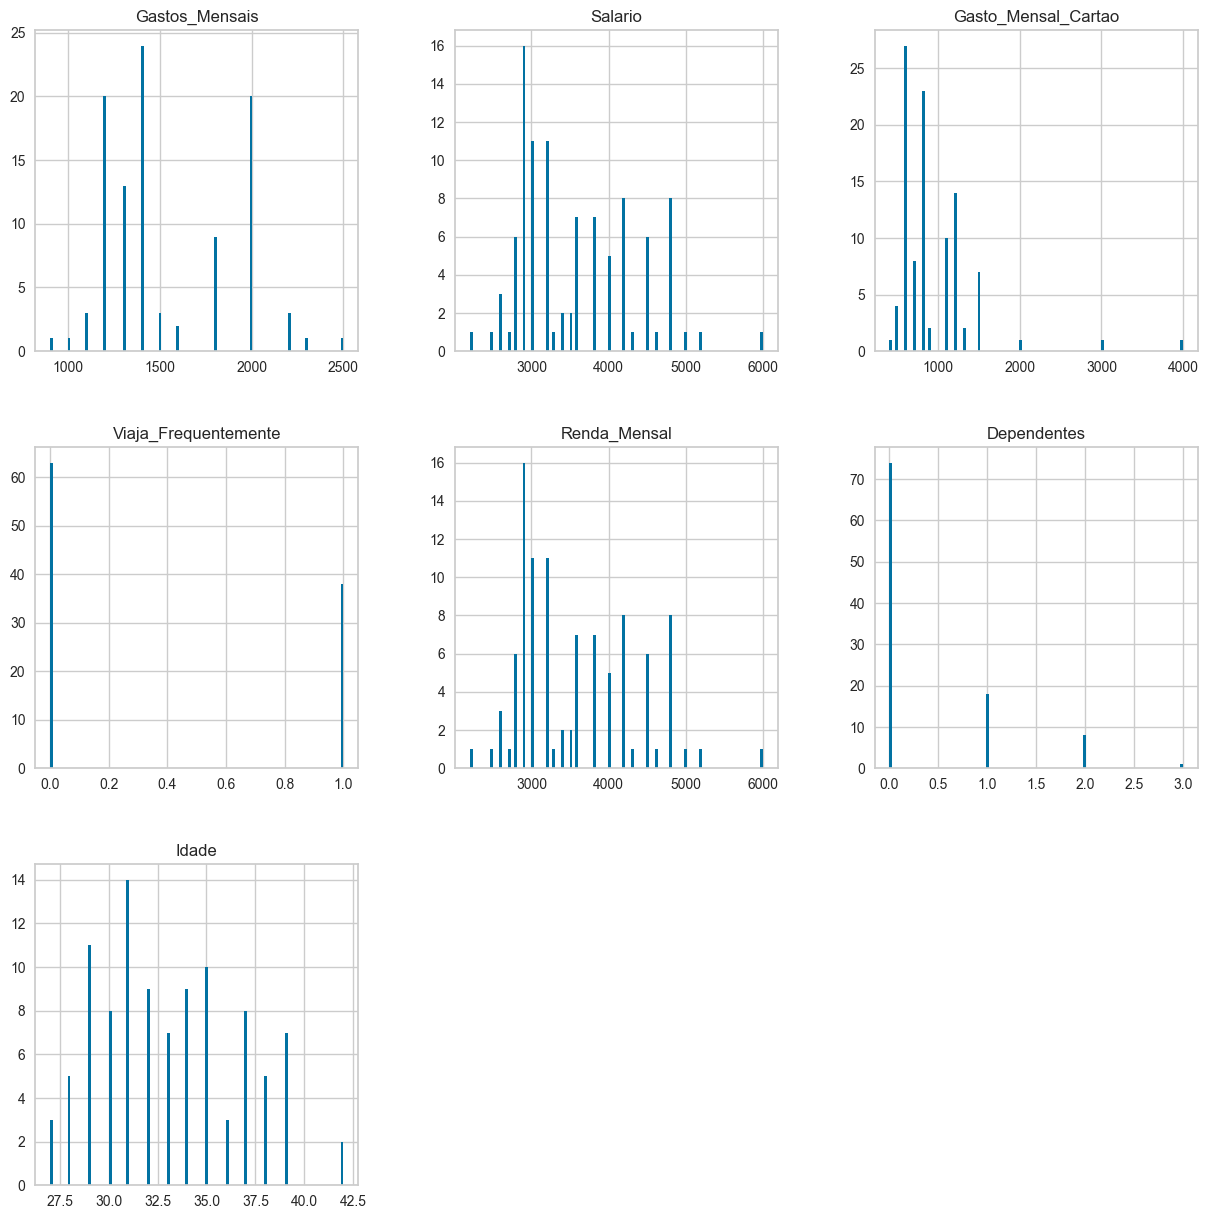

In [11]:
especificacao.hist(bins=100, figsize=(15, 15))
plt.show()

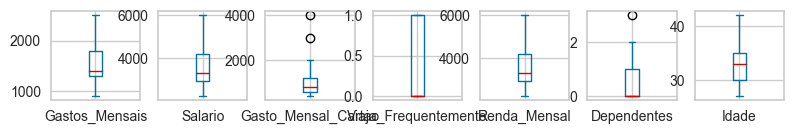

In [12]:
especificacao.plot(kind='box', subplots=True, layout=(len(especificacao.columns),len(especificacao.columns)), sharex=False, sharey=False, figsize=(15, 15))
plt.show()

In [13]:
entradas = especificacao[['Gastos_Mensais', 'Salario',
       'Gasto_Mensal_Cartao', 'Viaja_Frequentemente',
       'Renda_Mensal', 'Dependentes', 'Idade']]
classes = especificacao['Plano']

In [14]:
print(f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2)

print(f"Formato das tabelas de dados de treino {entradas_treino.shape} e teste {entradas_teste.shape}")

Formato das tabelas de dados (101, 7) e classes (101,)
Formato das tabelas de dados de treino (80, 7) e teste (21, 7)


In [15]:

from sklearn.neighbors import KNeighborsClassifier

k = 12
modelo = KNeighborsClassifier(n_neighbors=k)

modelo.fit(entradas_treino, classes_treino)

KNeighborsClassifier(n_neighbors=12)

In [16]:
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))

Predição: ['Plano Serenidade' 'Plano Conexão' 'Plano Equilíbrio' 'Plano Serenidade'
 'Plano Serenidade' 'Plano Conexão' 'Plano Equilíbrio' 'Plano Equilíbrio'
 'Plano Serenidade' 'Plano Equilíbrio' 'Plano Serenidade'
 'Plano Serenidade' 'Plano Serenidade' 'Plano Conexão' 'Plano Equilíbrio'
 'Plano Conexão' 'Plano Equilíbrio' 'Plano Conexão' 'Plano Equilíbrio'
 'Plano Serenidade' 'Plano Equilíbrio']


In [17]:
from sklearn.metrics import accuracy_score
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)

Acerto médio de classificação:  0.42857142857142855


In [18]:
df_treino = pd.concat((entradas_treino, classes_treino), axis=1)

novas_classes = pd.Series(classes_encontradas, name="species", index=entradas_teste.index)
df_teste = pd.concat((entradas_teste, novas_classes), axis=1)

In [19]:
df_treino

,Gastos_Mensais,Salario,Gasto_Mensal_Cartao,Viaja_Frequentemente,Renda_Mensal,Dependentes,Idade,Plano
14,1100,2600,600,0,2600,0,31,Plano Equilíbrio
3,2500,6000,4000,1,6000,0,34,Plano Conexão
34,2000,4200,1500,1,4200,0,37,Plano Equilíbrio
23,2200,4500,1100,1,4500,0,31,Plano Equilíbrio
99,1200,2900,600,0,2900,0,38,Plano Serenidade
...,...,...,...,...,...,...,...,...
97,1400,3000,800,1,3000,0,34,Plano Equilíbrio
31,1400,3600,800,0,3600,1,29,Plano Equilíbrio
13,1300,3000,800,1,3000,0,33,Plano Equilíbrio
85,1300,3200,800,0,3200,0,31,Plano Conexão


In [20]:
df_teste

,Gastos_Mensais,Salario,Gasto_Mensal_Cartao,Viaja_Frequentemente,Renda_Mensal,Dependentes,Idade,species
83,1200,2900,600,0,2900,0,29,Plano Serenidade
39,2000,4800,1200,1,4800,0,36,Plano Conexão
66,1400,3800,1200,0,3800,0,39,Plano Equilíbrio
71,1200,2900,600,0,2900,0,33,Plano Serenidade
33,1300,3000,500,0,3000,1,30,Plano Serenidade
36,2000,4500,1500,0,4500,0,38,Plano Conexão
21,1400,3600,800,1,3600,0,32,Plano Equilíbrio
75,1400,3800,600,0,3800,0,30,Plano Equilíbrio
26,1300,2900,600,1,2900,1,29,Plano Serenidade
43,1400,3600,800,0,3600,2,31,Plano Equilíbrio


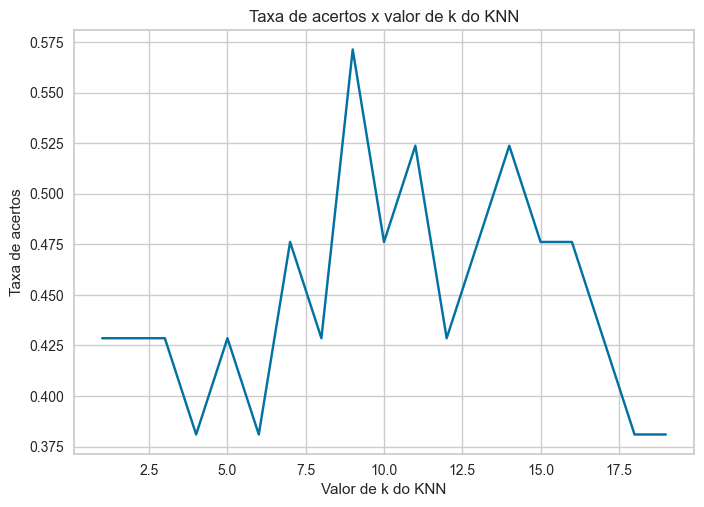

In [21]:
k_range = list(range(1,20))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))


plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


In [22]:
dados = pd.read_csv("Dataset_cliente_processado.csv")
X = entradas
y = classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

lda_model = LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
lda_model.fit(X_train, y_train)


scores = cross_val_score(lda_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")

Cross-validation scores: [0.38095238 0.35       0.35       0.45       0.45      ]
Mean cross-validation score: 0.39619047619047615


In [23]:
y_pred = lda_model.predict(X_test)
print("Relatório de Classificação para LDA:")
print(classification_report(y_test, y_pred))

Relatório de Classificação para LDA:
                  precision    recall  f1-score   support

   Plano Conexão       0.29      0.60      0.39        10
Plano Equilíbrio       0.50      0.43      0.46        28
Plano Serenidade       0.33      0.15      0.21        13

        accuracy                           0.39        51
       macro avg       0.37      0.39      0.35        51
    weighted avg       0.42      0.39      0.38        51



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


entradas_processadas = pd.get_dummies(entradas)
label_encoder = LabelEncoder()
classes_processadas = label_encoder.fit_transform(classes)
X_train, X_test, y_train, y_test = train_test_split(entradas_processadas, classes_processadas, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')

Acurácia do modelo: 0.5238095238095238


In [25]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

y_pred_rf = modelo_rf.predict(X_test)

acuracia_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia do modelo Random Forest: {acuracia_rf}')

Acurácia do modelo Random Forest: 0.47619047619047616


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
revocacao = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
matriz_confusao = confusion_matrix(y_test, y_pred)
#roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')

print(f'Acurácia: {acuracia}')
print(f'Precisão: {precisao}')
print(f'Revocação: {revocacao}')
print(f'F1-Score: {f1}')
print(f'Matriz de Confusão:\n{matriz_confusao}')
#print(f'ROC-AUC: {roc_auc}')

Acurácia: 0.5238095238095238
Precisão: 0.7063492063492064
Revocação: 0.5238095238095238
F1-Score: 0.5303030303030303
Matriz de Confusão:
[[4 0 0]
 [8 6 0]
 [0 2 1]]


In [32]:
from pycaret.classification import *
especificacao = pd.read_csv('Dataset_cliente_processado.csv')

especificacao.loc[:, 'Viaja_Frequentemente'] = especificacao['Viaja_Frequentemente'].replace({"Sim": 1, "Não": 0})
especificacao.loc[:, 'Dependentes'] = especificacao['Dependentes'].replace({"1\"": 1, "0\"": 0, "2\"": 2, "3\"": 3})
entradas = especificacao[['Gastos_Mensais', 'Salario', 'Gasto_Mensal_Cartao', 'Viaja_Frequentemente', 'Renda_Mensal', 'Dependentes', 'Idade']]
classes = especificacao['Plano']
entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.2, random_state=42)

clf1 = setup(data=entradas, target=classes, session_id=123)

best_model = compare_models(n_select=2)

# save_model(best_model, 'modelo_melhor_salvo')

,Description,Value
0,Session id,123
1,Target,Plano
2,Target type,Multiclass
3,Target mapping,"Plano Conexão: 0, Plano Equilíbrio: 1, Plano Serenidade: 2"
4,Original data shape,"(101, 8)"
5,Transformed data shape,"(101, 8)"
6,Transformed train set shape,"(70, 8)"
7,Transformed test set shape,"(31, 8)"
8,Numeric features,7
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6429,0.7530,0.6429,0.7086,0.6273,0.4307,0.4774,0.5280
gbc,Gradient Boosting Classifier,0.6143,0.0000,0.6143,0.6229,0.5964,0.3645,0.3761,0.5010
dt,Decision Tree Classifier,0.5857,0.6683,0.5857,0.6369,0.5818,0.3458,0.3666,0.0750
rf,Random Forest Classifier,0.5714,0.7082,0.5714,0.5710,0.5563,0.2970,0.3046,0.3140
qda,Quadratic Discriminant Analysis,0.5571,0.0000,0.5571,0.5205,0.5033,0.2829,0.3290,0.0410
ada,Ada Boost Classifier,0.5571,0.0000,0.5571,0.5317,0.5084,0.2445,0.2798,0.1690
knn,K Neighbors Classifier,0.5429,0.7081,0.5429,0.5167,0.5103,0.2530,0.2683,0.2080
lightgbm,Light Gradient Boosting Machine,0.5143,0.6876,0.5143,0.5324,0.4902,0.1900,0.2145,0.1270
dummy,Dummy Classifier,0.4857,0.5000,0.4857,0.2408,0.3205,0.0000,0.0000,0.0490
lr,Logistic Regression,0.4571,0.0000,0.4571,0.3953,0.4040,0.0862,0.1057,1.9680


In [28]:
best_model

# modelo_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                        max_depth=None, max_features=None, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_samples_leaf=1,
#                        min_samples_split=2, min_weight_fraction_leaf=0.0,
#                        monotonic_cst=None, random_state=123, splitter='best')
# modelo_dt.fit(entradas_treino, classes_treino)
# classes_encontradas_dt = modelo_dt.predict(entradas_teste)
# acuracia_dt = accuracy_score(classes_teste, classes_encontradas_dt)

# modelo_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features='sqrt',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_samples_leaf=1,
#                        min_samples_split=2, min_weight_fraction_leaf=0.0,
#                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
#                        oob_score=False, random_state=123, verbose=0,
#                        warm_start=False)

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_scor

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

modelo_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        monotonic_cst=None, n_estimators=100, n_jobs=-1,
                        oob_score=False, random_state=123, verbose=0,
                        warm_start=False)

modelo_rf.fit(entradas_treino, classes_treino)
classes_encontradas_rf = modelo_rf.predict(entradas_teste)
acuracia_rf = accuracy_score(classes_teste, classes_encontradas_rf)
modelo_rf


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [35]:
from sklearn.ensemble import ExtraTreesClassifier


modelo_et = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False)
                      
modelo_et.fit(entradas_treino, classes_treino)
classes_encontradas_et = modelo_et.predict(entradas_teste)
acuracia_et = accuracy_score(classes_teste, classes_encontradas_et)


In [38]:
from sklearn.metrics import (classification_report)
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict


scores = cross_val_score(modelo_et, entradas, classes, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {np.mean(scores)}")

# Obter previsões de validação cruzada
y_pred_cv = cross_val_predict(modelo_et, entradas, classes, cv=5)

# Gerar o relatório de classificação para a validação cruzada
print("Relatório de Classificação para Random Forest Classifier (Validação Cruzada):")
print(classification_report(classes, y_pred_cv))

Cross-validation scores: [0.52380952 0.7        0.75       0.7        0.8       ]
Mean cross-validation score: 0.6947619047619048
Relatório de Classificação para Random Forest Classifier (Validação Cruzada):
                  precision    recall  f1-score   support

   Plano Conexão       0.77      0.65      0.71        26
Plano Equilíbrio       0.66      0.82      0.73        49
Plano Serenidade       0.72      0.50      0.59        26

        accuracy                           0.69       101
       macro avg       0.72      0.66      0.68       101
    weighted avg       0.70      0.69      0.69       101

